In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

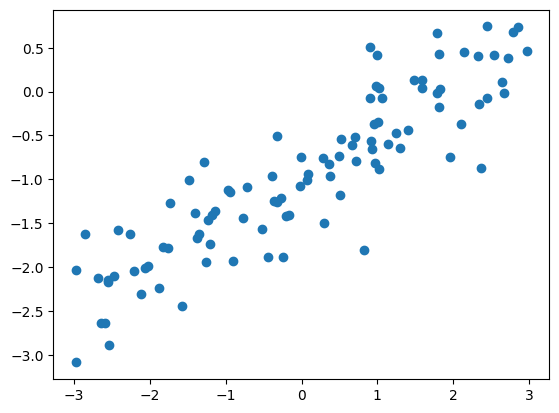

In [3]:
plt.scatter(X, y);

In [4]:
# build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [4]:
model.summary()

In [5]:
model.compile(
  loss='mse',
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.1),
  metrics=['mae']
)

In [6]:
r = model.fit(
  X.reshape(-1, 1), y,
  epochs=200,
  batch_size=32,
)

Epoch 1/200
4/4 [==============================] - 2s 10ms/step - loss: 3.3208 - mae: 1.4979
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 1.2770 - mae: 0.9252
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3209 - mae: 0.4526
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2083 - mae: 0.3535
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3547 - mae: 0.4678
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4141 - mae: 0.5084
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3192 - mae: 0.4447
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2170 - mae: 0.3574
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1788 - mae: 0.3285
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1864 - mae: 0.3369
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2

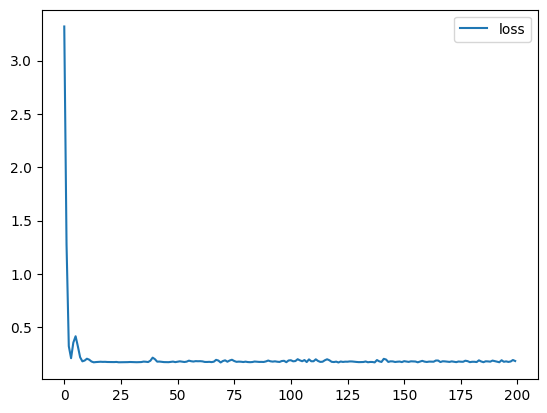

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend();

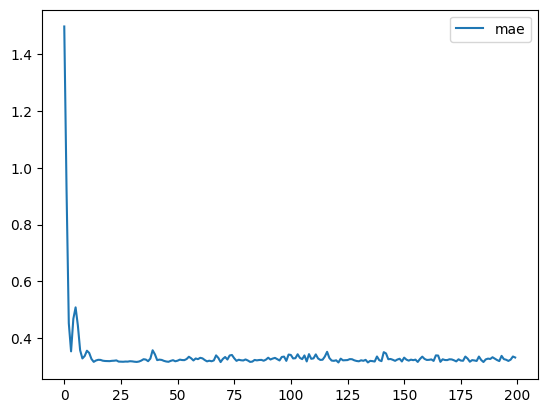

In [8]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend();

In [9]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 281ms/step


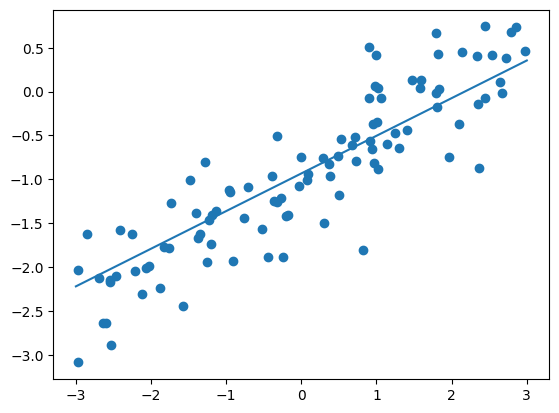

In [10]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [11]:
# Check the learned parameters
model.layers

In [12]:
model.layers[1].get_weights()

[array([[0.42911175]], dtype=float32), array([-0.9328778], dtype=float32)]